In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('product_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df.head(100)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
95,1,Email,172fcd47-62ac-4976-bac7-6934464a8c5c,8,81.98,0,23,Arizona
96,4,Call,750b0907-f87d-4c4e-95bf-de9952fb22c1,11,53.08,5,27,Kentucky
97,4,Call,8185cdfd-0b66-4ea3-aa77-c9e4d64f2b52,10,51.82,0,27,Ohio
98,5,Email + Call,b70489e0-d3d4-494d-b4c9-fa7f71ba4b21,12,185.65,1,27,Michigan


In [5]:
#Check number of missing values in each column
df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [6]:
#Only the 'revenue' column has missing values. I will remove them in this cell
df.dropna(inplace=True)
df.isna().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

In [7]:
#Check out as there are some duplicate entries in the 'sales_method' column
print(df['sales_method'].unique())

['Email + Call' 'Call' 'Email' 'em + call' 'email']


In [8]:
# Change ('em + call' to 'Email + Call') && ('email' to 'Email') 
df.loc[df.sales_method == 'em + call', 'sales_method'] = 'Email + Call'
df.loc[df.sales_method == 'email', 'sales_method'] = 'Email'

In [11]:
#Now we have 13926 rows, 8 columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13926 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13926 non-null  int64  
 1   sales_method       13926 non-null  object 
 2   customer_id        13926 non-null  object 
 3   nb_sold            13926 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  13926 non-null  int64  
 6   nb_site_visits     13926 non-null  int64  
 7   state              13926 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.2+ KB


In [9]:
#Check 'years_as_customer' column 
df['years_as_customer'].value_counts().sort_index()

0     1348
1     2336
2     1841
3     1500
4     1232
5     1042
6      856
7      661
8      555
9      476
10     376
11     301
12     267
13     230
14     157
15     144
16     114
17      80
18      76
19      53
20      53
21      36
22      38
23      16
24      24
25      16
26      19
27      14
28       8
29       5
30       9
31       6
32       5
33       8
34       7
35       5
36       4
37       2
38       2
39       2
47       1
63       1
Name: years_as_customer, dtype: int64

In [10]:
#In the prob definition, the company was founded in 1984. Therefore, 'years_as_customer' values above 39 (this report is done in 2023) are outliers and should be removed.
df.drop(df[df['years_as_customer'] > 39].index, axis=0, inplace=True)

#Verify outliers are removed
df['years_as_customer'].value_counts().sort_index()

0     1348
1     2336
2     1841
3     1500
4     1232
5     1042
6      856
7      661
8      555
9      476
10     376
11     301
12     267
13     230
14     157
15     144
16     114
17      80
18      76
19      53
20      53
21      36
22      38
23      16
24      24
25      16
26      19
27      14
28       8
29       5
30       9
31       6
32       5
33       8
34       7
35       5
36       4
37       2
38       2
39       2
Name: years_as_customer, dtype: int64

In [15]:
#Now we have 13924 rows, 8 columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13924 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13924 non-null  int64  
 1   sales_method       13924 non-null  object 
 2   customer_id        13924 non-null  object 
 3   nb_sold            13924 non-null  int64  
 4   revenue            13924 non-null  float64
 5   years_as_customer  13924 non-null  int64  
 6   nb_site_visits     13924 non-null  int64  
 7   state              13924 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.0+ KB


# Task 1: Summary of Data Validation:

Before cleaning, the dataset "product_sales.csv" has 15000 rows and 8 columns. Data cleaning steps for each column are shown as below:
- **week**: Values are integers in the range from 1 to 6, they match the description given. There are no missing values. No cleaning is needed.
- **sales_method**: 5 types of values exist, there are no missing values. I changed "em + call" to "Email + Call", and changed "email" to "Email". There are now 3 types of values, which match the description given.
- **customer_id**: Values match the description given, no missing values. No cleaning is needed.
- **nb_sold**: Values match the description given, no missing values. No cleaning is needed.
- **revenue**: Values match the description given, there are 1074 missing values. I removed them from the dataset.
- **years_as_customer**: In the prob definition, the company was founded in 1984. Therefore, 'years_as_customer' values above 39 (report done in 2023) are outliers and should be removed. I removed 2 outliers from the dataset.
- **nb_site_visits**: Values match the description given, no missing values. No cleaning is needed.
- **states**: Values match the description given, no missing values. No cleaning is needed.

The final contains 13924 rows and 8 columns (after removing 1074 missing values, 2 outliers).

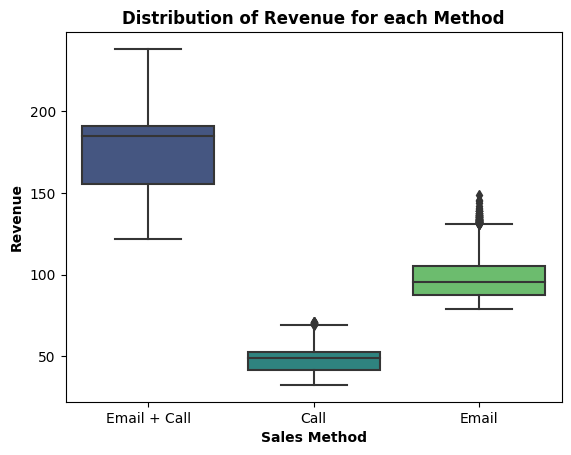

In [11]:
sns.boxplot(data=df, x='sales_method', y='revenue', palette='viridis')
plt.title('Distribution of Revenue for each Method', size=12, weight='bold')
plt.xlabel('Sales Method', size=10, weight='bold')
plt.ylabel('Revenue', size=10, weight='bold')

plt.show()

# Task 2: Exploratory Analysis

**Q1. How many customers were there for each approach?**

![Visual_Task2Q1](Visual_Task2Q1.PNG)

The bar chart above displays the number of customers for each approach. According to the chart, there were 6921 customers for the 'Email' method, 4780 customers for the 'Call' and 2223 customers for the 'Email + Call'. We can easily see that the 'Email' sales method had the highest number of customers.

**Q2. What does the spread of revenue look like overall? And for each method?**

![Visual_Task2Q2_Pic1](Visual_Task2Q2_Pic1.PNG)

The histogram above displays the spread of revenue overall. From the histogram, we can conclude that most of the sales revenue are between 30 and 120. The histogram is asymmetrical.

![Visual_Task2Q2_Pic2](Visual_Task2Q2_Pic2.png) 

The box plot above shows the spread of revenue for each method. The 'Call' method has the lowest revenue, whereas the 'Email + Call' has the highest. There are many outliers in the display of the 'Email' method, which indicates that the revenue distribution for this method is unstable.

![Visual_Task2Q2_Pic3](Visual_Task2Q2_Pic3.PNG)

The pie chart above displays the the proportion of each sales method in the total revenue. From the chart, the conclusion is that the 'Email' method has the highest proportion in the total revenue, and the 'Call' has the lowest proportion.

**Q3. Was there any difference in revenue over time for each of the methods?**

![Visual_Task2Q3](Visual_Task2Q3.PNG)

By plotting the data on a line graph, we can see that the 'Email' method produced the highest amount of revenue in Week 1 as started with value of 229765.55 USD and only decreased as the weeks went on. Over the following 2 weeks, the revenue generated from the email approach slumped down to 98792 USD. 

It is also clearly to see that while the 'Email + Call' started much lower than the  'Email' approach, it ended on the top spot by the end of the series. It appears that this approach was the most successfully.
